# 📝 Exercise M4.02

The goal of this exercise is to build an intuition on what will be the
parameters' values of a linear model when the link between the data and the
target is non-linear.

First, we will generate such non-linear data.

<div class="admonition tip alert alert-warning">
<p class="first admonition-title" style="font-weight: bold;">Tip</p>
<p class="last"><tt class="docutils literal">np.random.RandomState</tt> allows to create a random number generator which can
be later used to get deterministic results.</p>
</div>

In [1]:
import numpy as np
# Set the seed for reproduction
rng = np.random.RandomState(0)

# Generate data
n_sample = 100
data_max, data_min = 1.4, -1.4
len_data = (data_max - data_min)
data = rng.rand(n_sample) * len_data - len_data / 2
noise = rng.randn(n_sample) * .3
target = data ** 3 - 0.5 * data ** 2 + noise

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">To ease the plotting, we will create a Pandas dataframe containing the data
and target</p>
</div>

In [2]:
import pandas as pd
full_data = pd.DataFrame({"data": data, "target": target})

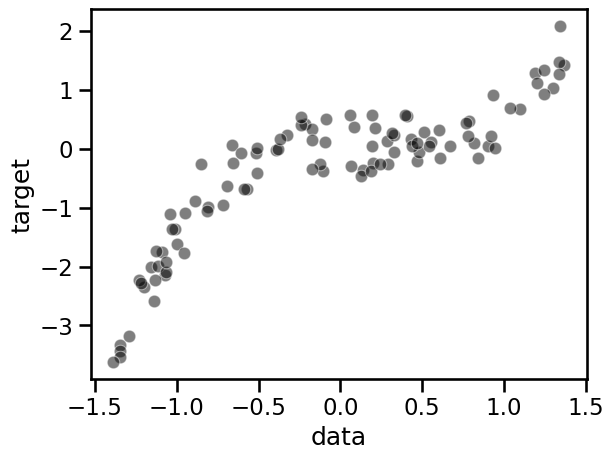

In [3]:
import seaborn as sns

_ = sns.scatterplot(data=full_data, x="data", y="target", color="black",
                    alpha=0.5)

We observe that the link between the data `data` and vector `target` is
non-linear. For instance, `data` could represent the years of
experience (normalized) and `target` the salary (normalized). Therefore, the
problem here would be to infer the salary given the years of experience.

Using the function `f` defined below, find both the `weight` and the
`intercept` that you think will lead to a good linear model. Plot both the
data and the predictions of this model.

In [4]:
def f(data, weight=0, intercept=0):
    target_predict = weight * data + intercept
    return target_predict

In [6]:
# Write your code here.
f(data, weight= 1.2,intercept= -0.2 )

array([-0.03598663,  0.52303627,  0.14528494, -0.04919251, -0.45651987,
        0.29020422, -0.40970697,  1.11635728,  1.35790688, -0.5916365 ,
        0.78019613, -0.10291307,  0.02862973,  1.2300047 , -1.64131884,
       -1.58724555, -1.81206618,  0.91760268,  0.73460668,  1.04324082,
        1.40815763,  0.80517278, -0.32942934,  0.74257803, -1.48259793,
        0.27013463, -1.39833295,  1.29408756, -0.12658964, -0.48673588,
       -0.99109314,  0.7214252 , -0.34733488,  0.02993807, -1.81686627,
        0.19525527,  0.17664163,  0.19289823,  1.29099354,  0.4109162 ,
       -0.67205345, -0.41157264,  0.46404082, -1.67764242,  0.36033616,
        0.37334324, -1.17311459, -1.44680764, -0.82016074, -0.65793181,
        0.03586115, -0.40629891,  1.4409361 , -1.53712944, -1.1781741 ,
       -1.33800002,  0.31444397, -1.02894022, -0.3131958 , -1.05873001,
       -1.3458622 , -1.50913953,  0.32526742, -1.41570528, -1.21948326,
       -0.64108343,  0.87853725, -1.55373971,  0.93549489, -1.55

Compute the mean squared error for this model

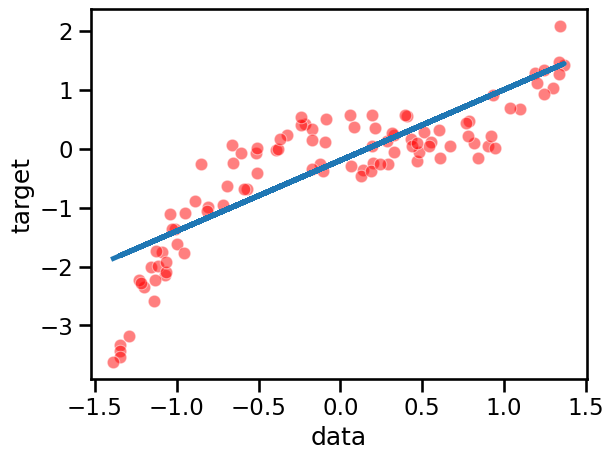

In [11]:
# Write your code here.
ax =sns.scatterplot(data = full_data, x= 'data',y= 'target',color = 'red', alpha = 0.5 )
_ = ax.plot(data,f(data, weight= 1.2,intercept= -0.2 ))

Train a linear regression model on this dataset.

<div class="admonition warning alert alert-danger">
<p class="first admonition-title" style="font-weight: bold;">Warning</p>
<p class="last">In scikit-learn, by convention <tt class="docutils literal">data</tt> (also called <tt class="docutils literal">X</tt> in the scikit-learn
documentation) should be a 2D matrix of shape <tt class="docutils literal">(n_samples, n_features)</tt>.
If <tt class="docutils literal">data</tt> is a 1D vector, you need to reshape it into a matrix with a
single column if the vector represents a feature or a single row if the
vector represents a sample.</p>
</div>

In [15]:
from sklearn.linear_model import LinearRegression

# Write your code here.
lr = LinearRegression()
d2_df = data.reshape(-1,1)
lr.fit(d2_df, target)

LinearRegression()

Compute predictions from the linear regression model and plot both the data
and the predictions.

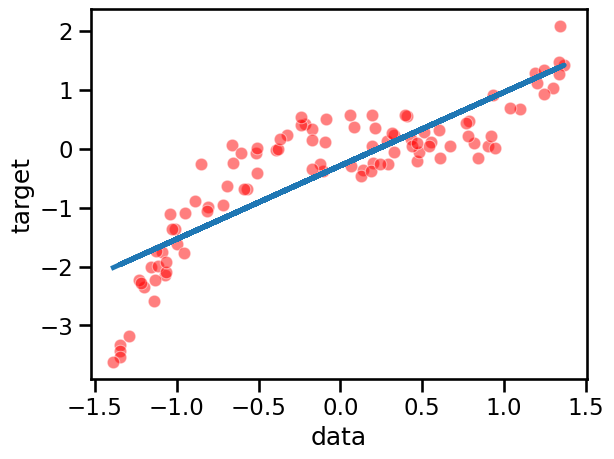

In [18]:
# Write your code here.
predict = lr.predict(d2_df)
ax =sns.scatterplot(data = full_data, x= 'data',y= 'target',color = 'red', alpha = 0.5 )
_ = ax.plot(data,predict)

Compute the mean squared error

In [21]:
from sklearn.metrics import mean_squared_error 
# Write your code here.
er = mean_squared_error(target, predict)
print(f'MSE is {er}')

MSE is 0.37117544002508424
